In [52]:
## Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#Load the DataSet

df = pd.read_csv('/content/economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [12]:
#Drop Un-Necessary Column

df.drop(columns = ["Unnamed: 0","year"],axis = 1,inplace =True)

In [14]:
df.drop(columns = ['month'],axis = 1 ,inplace =True)

In [15]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [16]:
#Check  Null Values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

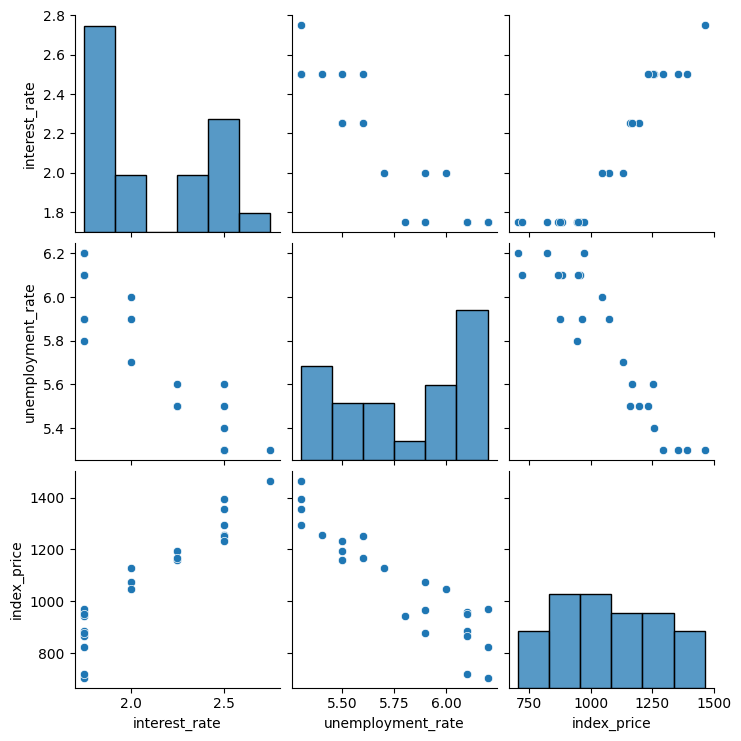

In [17]:
### Lets' Do Visualization
import seaborn as sns
sns.pairplot(df)

In [18]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

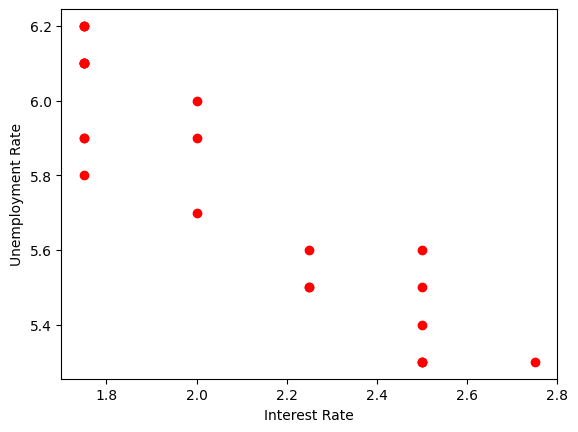

In [20]:
### Visualize the Datapoints More Closeley
plt.scatter(df['interest_rate'],df['unemployment_rate'],color = 'red')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')


In [22]:
### Get the Independent and Dependent Feature

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [24]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [25]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [26]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 30)


<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

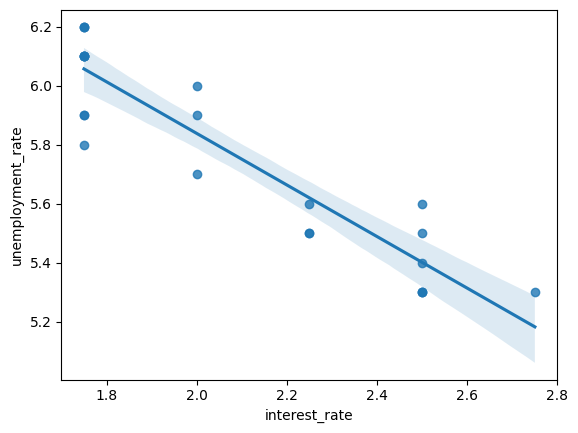

In [29]:
sns.regplot(x =df['interest_rate'],y=df['unemployment_rate'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

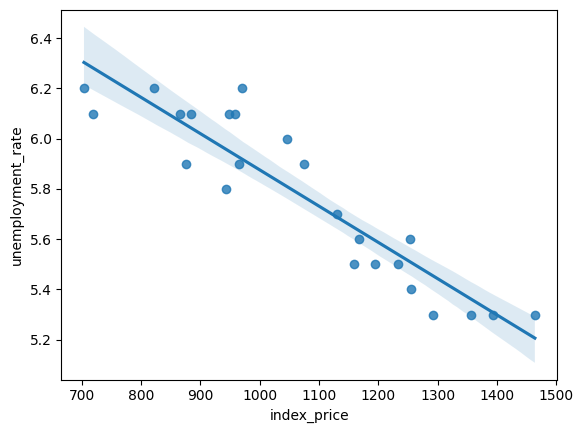

In [30]:
sns.regplot(x=df['index_price'],y=df['unemployment_rate'])

In [32]:
## Standerdize the Values
from sklearn.preprocessing import StandardScaler


In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [36]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [37]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [38]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(lin_reg,X_train,y_train,scoring = 'neg_mean_squared_error',cv = 3)






In [39]:
validation_score

array([-3554.50267742, -2039.28446585, -8650.46330139])

In [40]:
#MEan Validation score
np.mean(validation_score)

-4748.083481551748

In [41]:
### Prediction
y_pred = lin_reg.predict(X_test)


In [42]:
y_pred

array([1119.71959849,  949.25837312,  968.40764605, 1420.46127238,
        949.25837312])

In [43]:
###Performace  Metrics
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_test,y_pred)

mae = mean_absolute_error(y_test,y_pred)

rmse = np.sqrt(mse)

print("the MSE :-",mse)


print("the RMSE :-",rmse)


print("the MAE :-",mae)

the MSE :- 14622.60027035769
the RMSE :- 120.92394415647254
the MAE :- 84.6453550356021


In [45]:
### R^2 Performace MEtrics
from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_pred)

print("the R^2 :-",r2)

the R^2 :- 0.7817287787589459


In [47]:
#Display the Adjsuted R^2
print("Adjsuted R^2 :- ",(1 - (1 - r2) * (len(y_test) -1)) / ((len(y_test) -1) * (X_test.shape[1]-1)))
 # Add parenthesis around numerator and denominator

Adjsuted R^2 :-  0.031728778758945864


### **Assumptions**

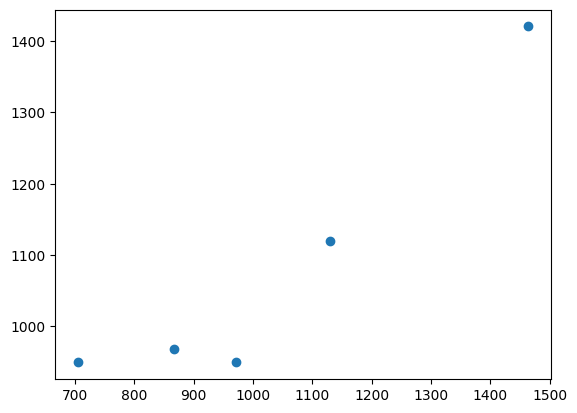

In [48]:
plt.scatter(y_test,y_pred)

In [49]:
residuals = y_test - y_pred

print(residuals)

10     10.280402
16     21.741627
19   -102.407646
0      43.538728
22   -245.258373
Name: index_price, dtype: float64


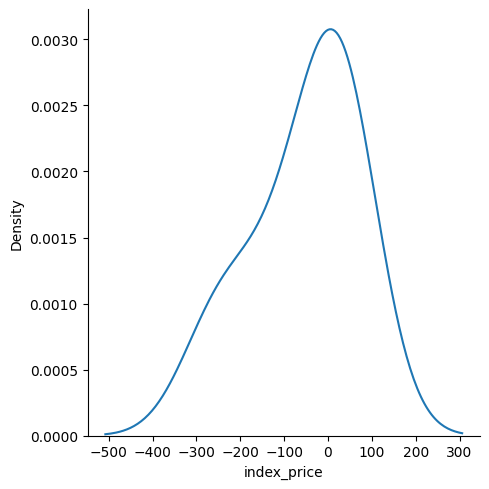

In [55]:
### Plot The Residuals
sns.displot(residuals,kind = 'kde')


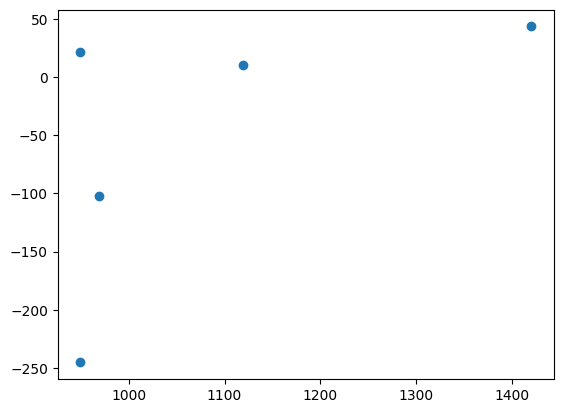

In [56]:
### Scatter Plot With Respect to Prediction aand residuals
plt.scatter(y_pred,residuals)

In [57]:
### Ols Linear Regression
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()


In [58]:
model.summary()


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.027
Model:                            OLS   Adj. R-squared (uncentered):             -0.088
Method:                 Least Squares   F-statistic:                             0.2341
Date:                Fri, 07 Jun 2024   Prob (F-statistic):                       0.794
Time:                        08:20:54   Log-Likelihood:                         -159.72
No. Observations:                  19   AIC:                                      323.4
Df Residuals:                      17   BIC:                                      325.3
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           115.7478    666.701      0.174      0.864   -1290.868    1522.364
x2           -67.4315    666.701     -0.101      0.921   -1474.048    1339.184
==============================================================================
Omnibus:                        6.208   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                3.615
Skew:                          -0.894   Prob(JB):                        0.164
Kurtosis:                       4.172   Cond. No.                         4.87
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
print(lin_reg.coef_)

[115.74776453 -67.43154829]
